In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [7]:
diabetes  = pd.read_csv("diabetes_012_health_indicators_BRFSS2015.csv")
diabetes.head()


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### DATA CLEANING

In [8]:
null_columns =diabetes.columns[diabetes.isna().any()].tolist()
print(null_columns)

[]


### Visualization

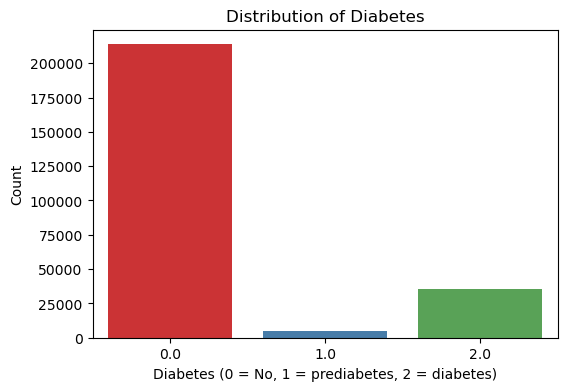

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Diabetes_012', data=diabetes, palette='Set1')
plt.title('Distribution of Diabetes')
plt.xlabel('Diabetes (0 = No, 1 = prediabetes, 2 = diabetes)')
plt.ylabel('Count')
plt.show()

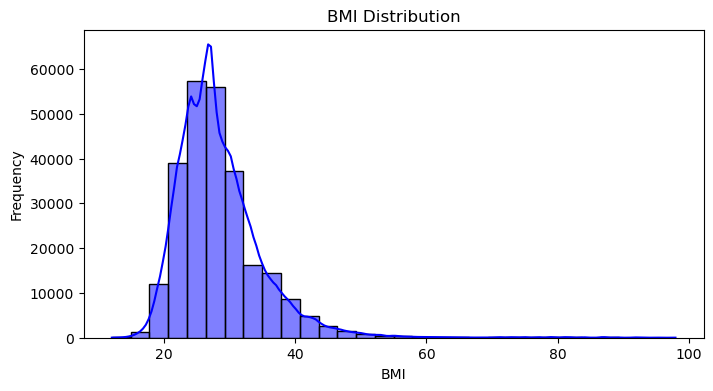

In [19]:
plt.figure(figsize=(8, 4))
sns.histplot(diabetes['BMI'], kde=True, bins=30, color='blue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

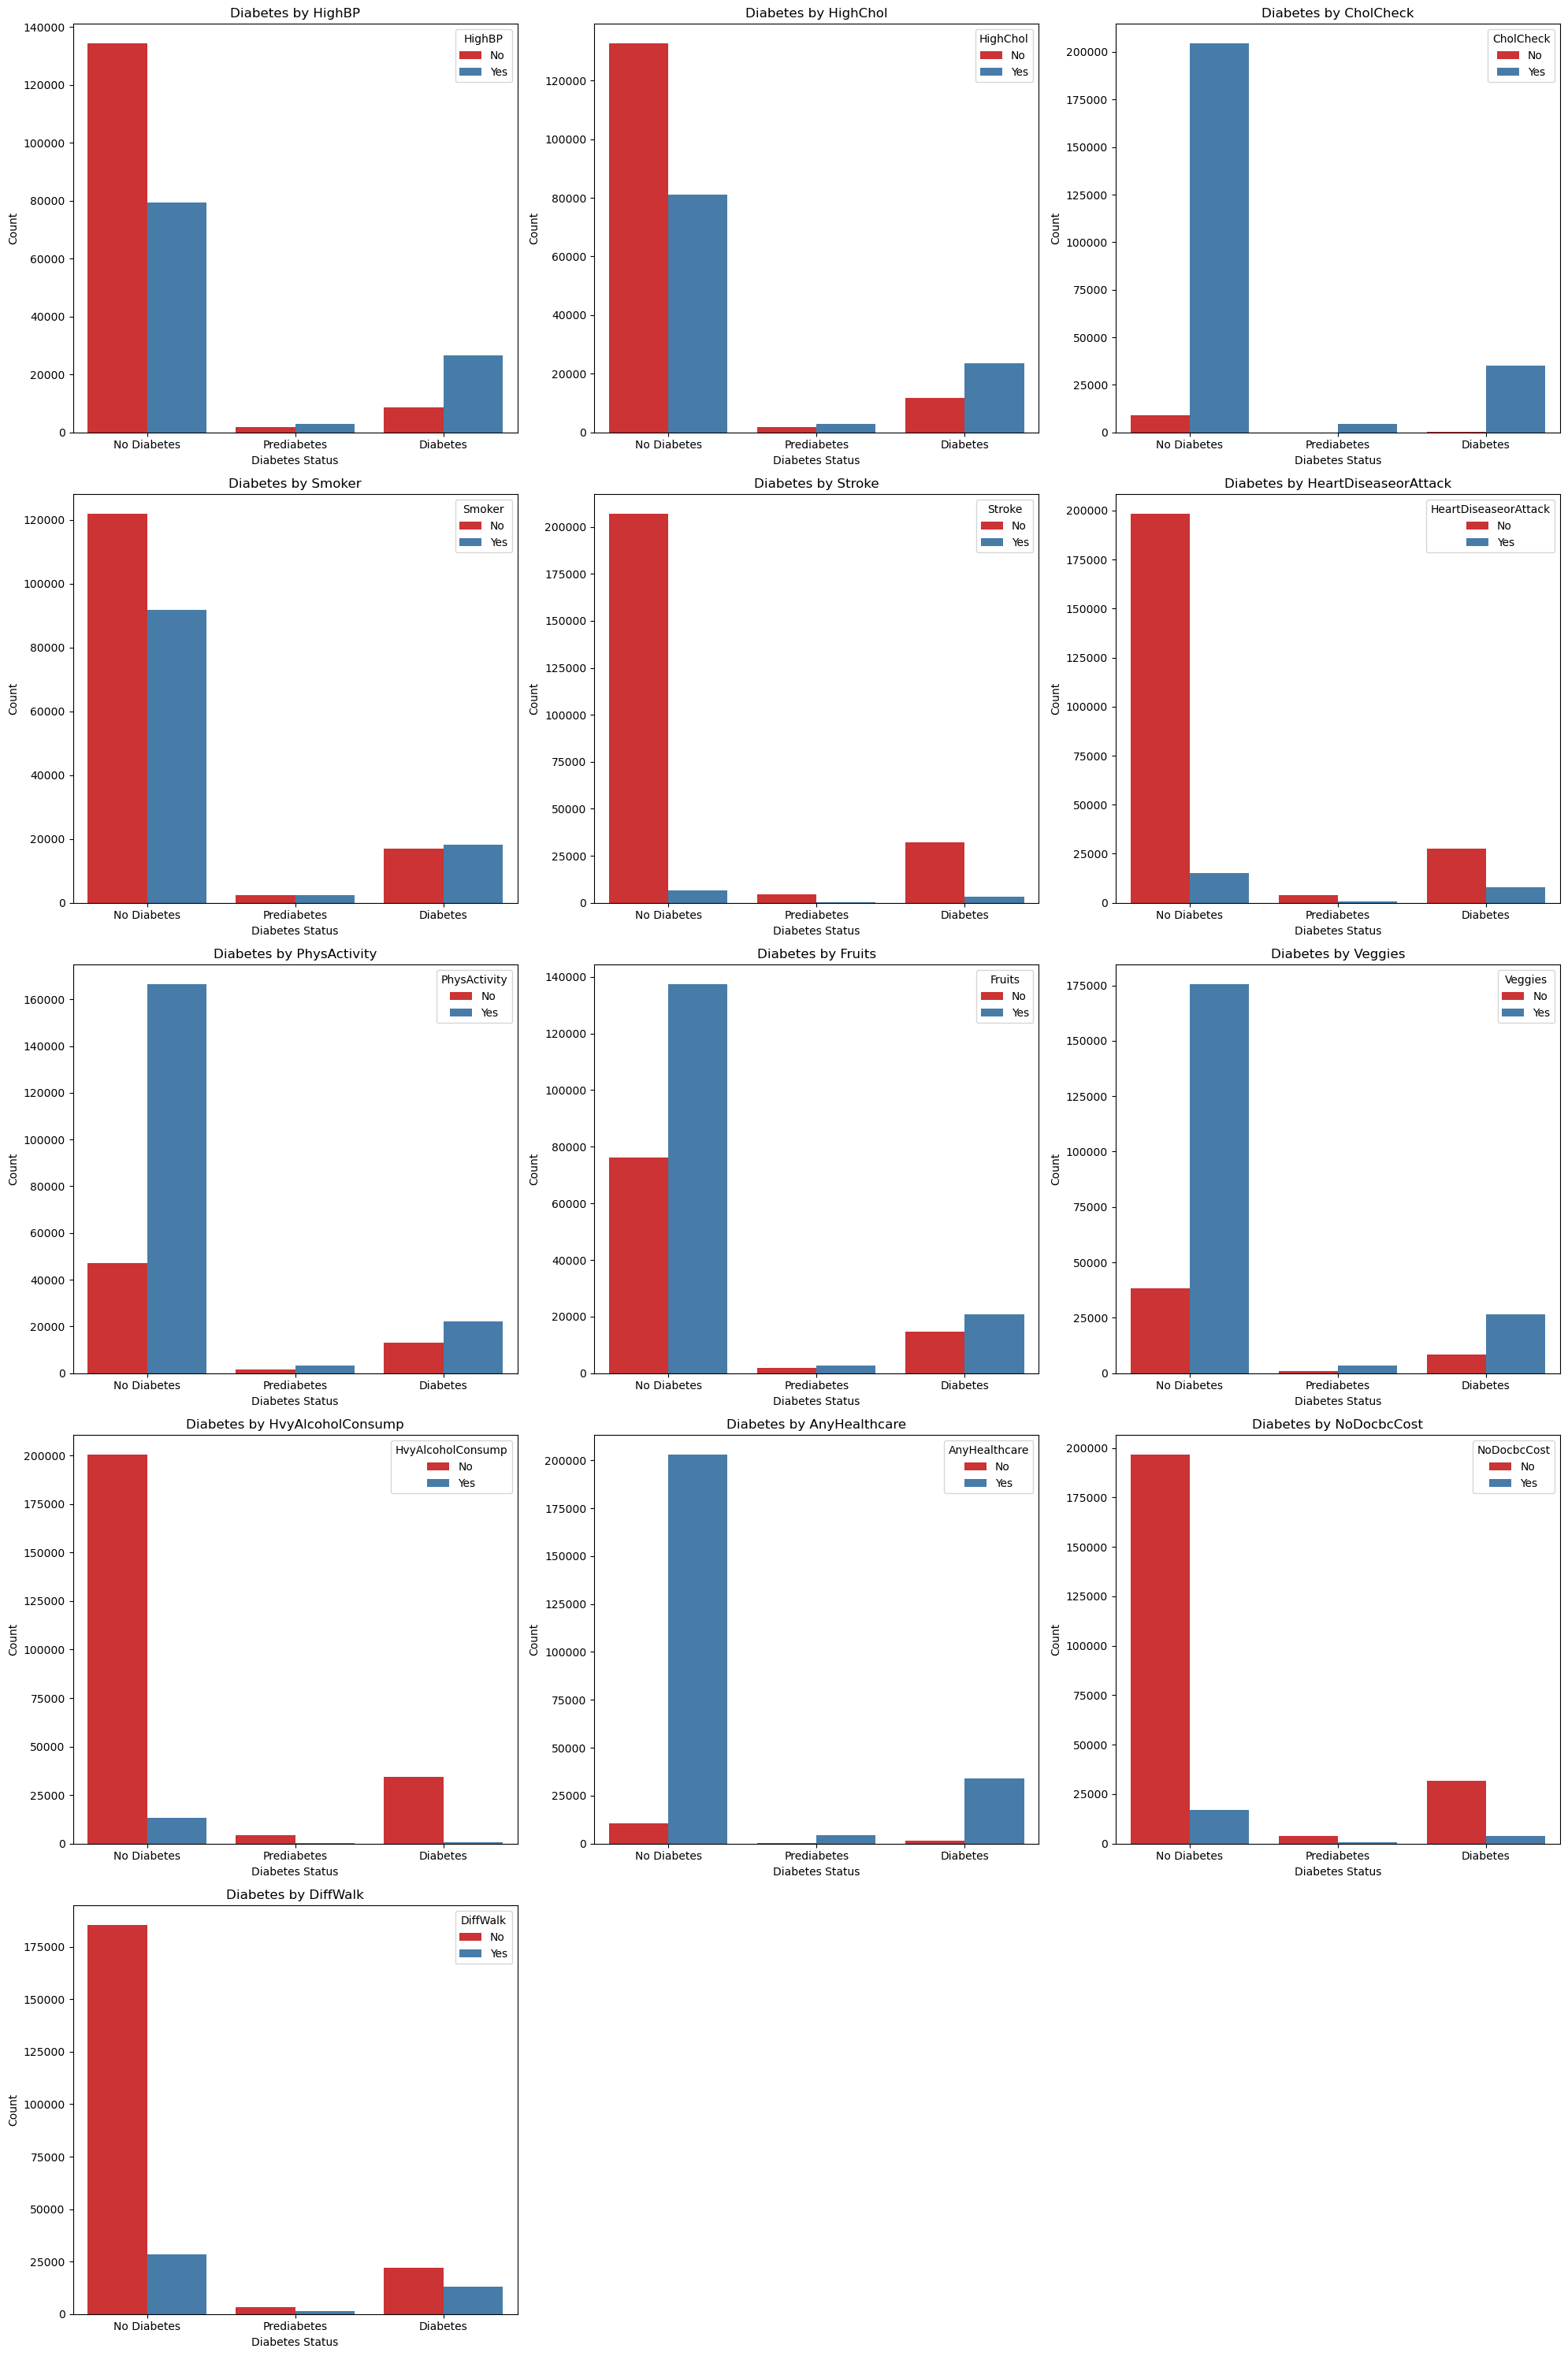

In [53]:
binary_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
                 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
                 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 
                  'DiffWalk']

plt.figure(figsize=(20, 30))
rows = 5  
cols = 3  
for i, feature in enumerate(binary_features, 1):
    plt.subplot(rows, cols, i)
    sns.countplot(x='Diabetes_012', hue=feature, data=diabetes, palette='Set1')
    plt.title(f'Diabetes by {feature}')
    plt.xlabel('Diabetes Status')
    plt.ylabel('Count')
    plt.xticks([0, 1, 2], ['No Diabetes', 'Prediabetes', 'Diabetes'])
    plt.legend(title=feature, labels=['No', 'Yes'])
    
for i in range(len(binary_features)+1, rows*cols+1):
    plt.subplot(rows, cols, i)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

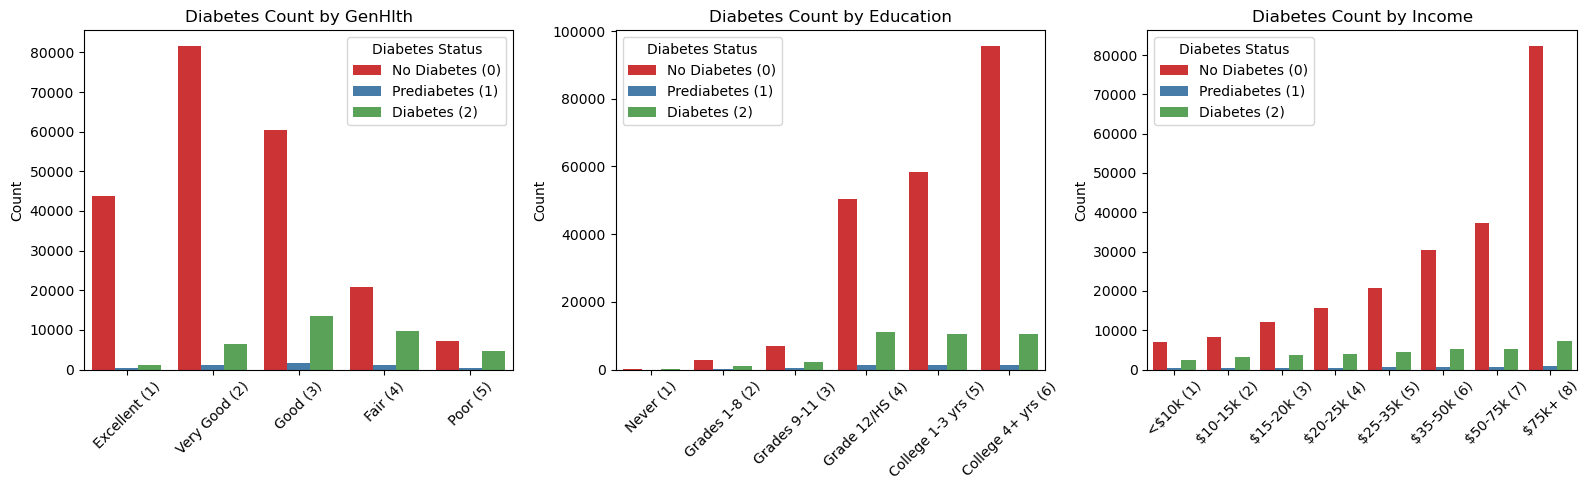

In [56]:
ordinal_features = ['GenHlth', 'Education', 'Income']
plt.figure(figsize=(16, 5))
for i, feature in enumerate(ordinal_features, 1):
    plt.subplot(1, 3, i)
    ax = sns.countplot(
        x=feature,
        hue='Diabetes_012',
        data=diabetes,
        palette='Set1',
        order=sorted(diabetes[feature].unique())
    )
    plt.title(f'Diabetes Count by {feature}')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Diabetes Status', 
              labels=['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)'])
    
    if feature == 'GenHlth':
        ax.set_xticklabels(['Excellent (1)', 'Very Good (2)', 'Good (3)', 'Fair (4)', 'Poor (5)'], rotation=45)
    elif feature == 'Education':
        ax.set_xticklabels([
            'Never (1)', 'Grades 1-8 (2)', 'Grades 9-11 (3)', 
            'Grade 12/HS (4)', 'College 1-3 yrs (5)', 'College 4+ yrs (6)'
        ], rotation=45)
    elif feature == 'Income':
        ax.set_xticklabels([
            '<$10k (1)', '$10-15k (2)', '$15-20k (3)', '$20-25k (4)',
            '$25-35k (5)', '$35-50k (6)', '$50-75k (7)', '$75k+ (8)'
        ], rotation=45)
        
    plt.tight_layout()
plt.show()

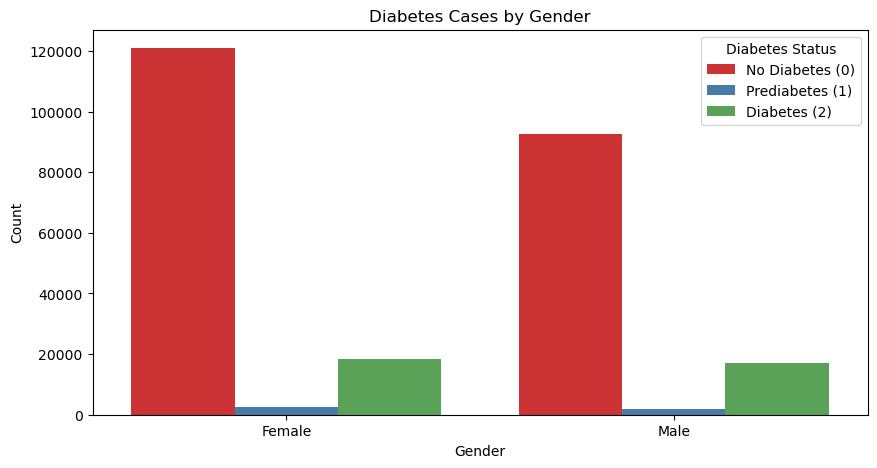

Total counts by gender:
0.0    141974
1.0    111706
Name: Sex, dtype: int64


In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Sex', hue='Diabetes_012', data=diabetes, palette='Set1')
plt.title('Diabetes Cases by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)'])
plt.xticks([0, 1], ['Female', 'Male']) 
plt.show()
gender_counts = diabetes['Sex'].value_counts()
print("Total counts by gender:")
print(gender_counts)

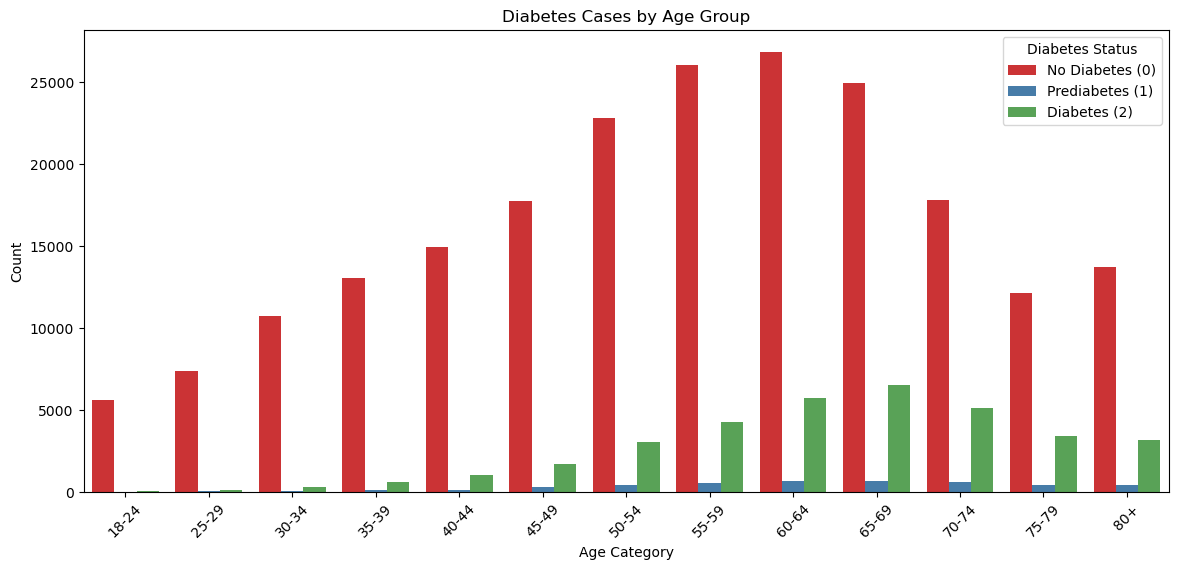

In [58]:
age_labels = {
    1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 
    6: '45-49', 7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 
    11: '70-74', 12: '75-79', 13: '80+'
}

plt.figure(figsize=(14, 6))
sns.countplot(
    x='Age', 
    hue='Diabetes_012', 
    data=diabetes, 
    palette='Set1'
)
plt.title('Diabetes Cases by Age Group')
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.legend(title='Diabetes Status', labels=['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)'])
plt.xticks(ticks=range(13), labels=age_labels.values(), rotation=45)
plt.show()

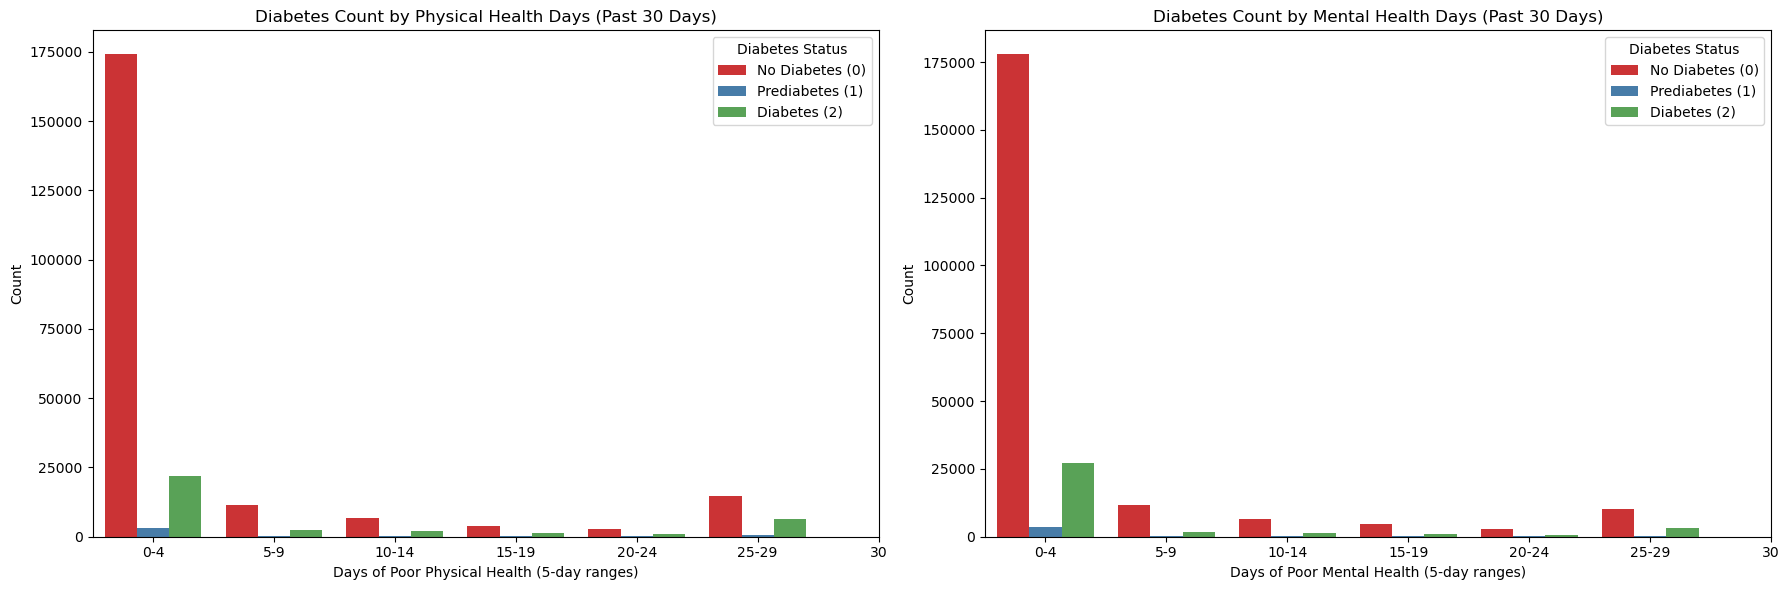

In [61]:
import numpy as np

bins = np.arange(0, 31, 5) 
labels = [f"{i}-{i+4}" for i in bins[:-2]] + ['25-29', '30']

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Physical Health Plot
sns.countplot(
    x=np.digitize(diabetes['PhysHlth'], bins=bins[:-1], right=False),
    hue='Diabetes_012',
    data=diabetes,
    palette='Set1',
    ax=ax1
)
ax1.set_title('Diabetes Count by Physical Health Days (Past 30 Days)')
ax1.set_xlabel('Days of Poor Physical Health (5-day ranges)')
ax1.set_ylabel('Count')
ax1.set_xticks(range(len(labels)))
ax1.set_xticklabels(labels)
ax1.legend(
    title='Diabetes Status',
    labels=['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']
)

# Mental Health Plot
sns.countplot(
    x=np.digitize(diabetes['MentHlth'], bins=bins[:-1], right=False),
    hue='Diabetes_012',
    data=diabetes,
    palette='Set1',
    ax=ax2
)
ax2.set_title('Diabetes Count by Mental Health Days (Past 30 Days)')
ax2.set_xlabel('Days of Poor Mental Health (5-day ranges)')
ax2.set_ylabel('Count')
ax2.set_xticks(range(len(labels)))
ax2.set_xticklabels(labels)
ax2.legend(
    title='Diabetes Status',
    labels=['No Diabetes (0)', 'Prediabetes (1)', 'Diabetes (2)']
)

plt.tight_layout()
plt.show()

### Correlation Matrix

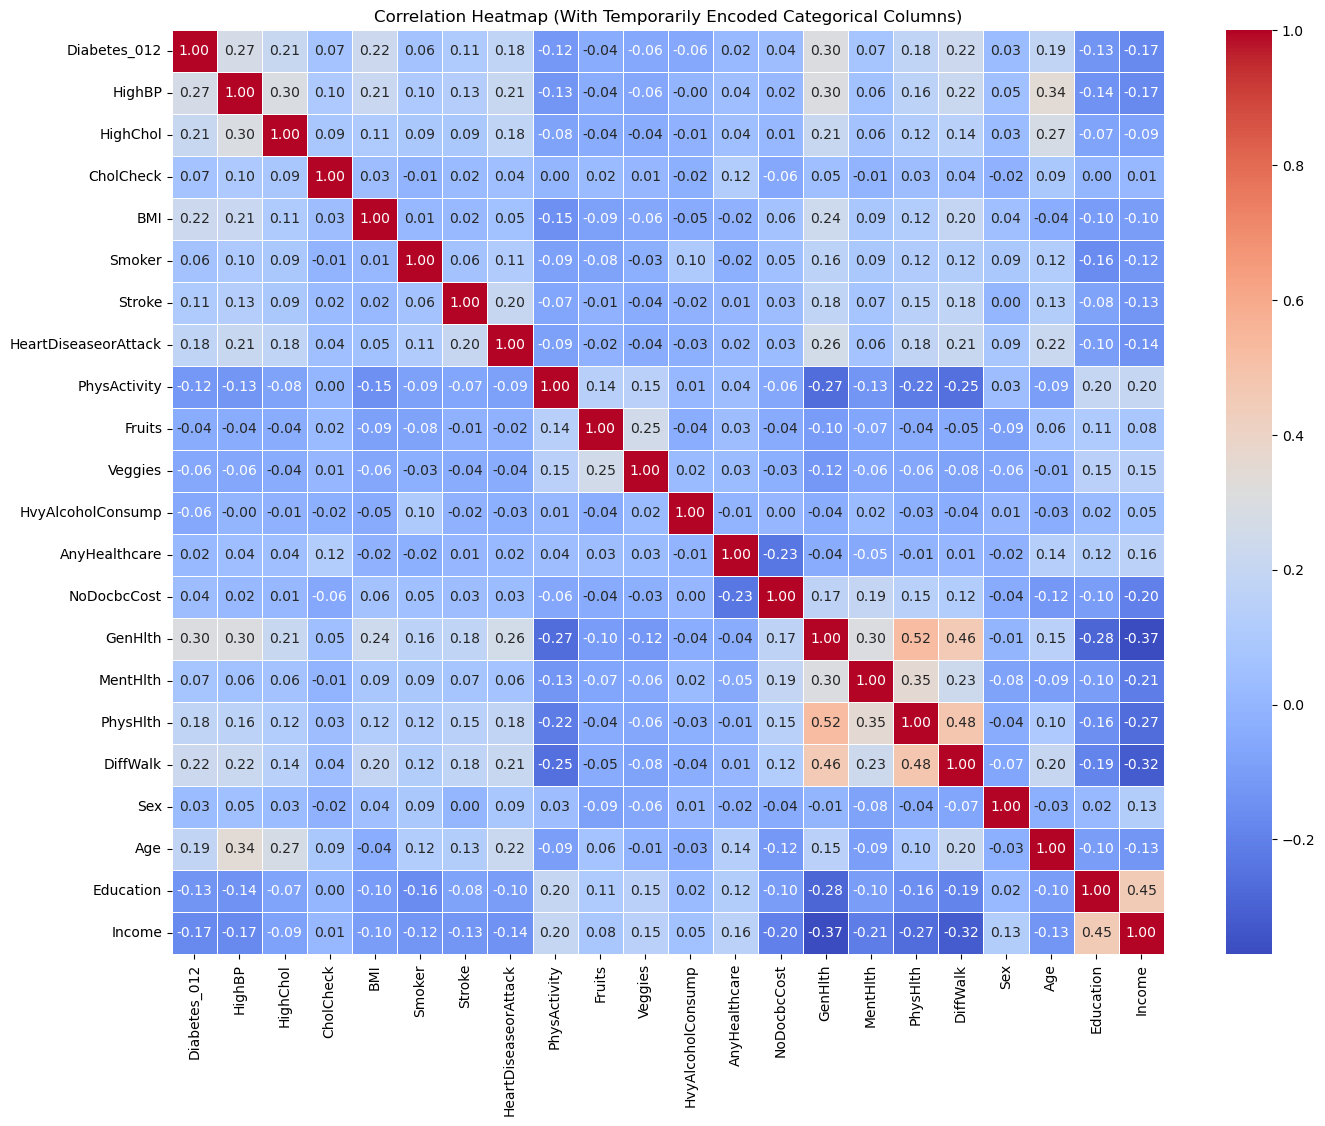

Top Correlated Column Pairs:
        Feature 1  Feature 2  Correlation
366      PhysHlth    GenHlth     0.524364
390      DiffWalk   PhysHlth     0.478417
325       GenHlth   DiffWalk     0.456920
482        Income  Education     0.449106
329       GenHlth     Income    -0.370014
367      PhysHlth   MentHlth     0.353619
419           Age     HighBP     0.344452
395      DiffWalk     Income    -0.320124
14   Diabetes_012    GenHlth     0.302587
344      MentHlth    GenHlth     0.301674


In [62]:
df_temp = diabetes.copy()

correlation_matrix = df_temp.corr()
# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (With Temporarily Encoded Categorical Columns)")
plt.show()

correlation_pairs = correlation_matrix.unstack().reset_index()
correlation_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

correlation_pairs = correlation_pairs[correlation_pairs['Feature 1'] != correlation_pairs['Feature 2']]

# Sort by absolute correlation value in descending order
correlation_pairs = correlation_pairs.reindex(correlation_pairs['Correlation'].abs().sort_values(ascending=False).index)

# Drop duplicate pairs (since correlation is symmetric)
correlation_pairs = correlation_pairs.iloc[::2]

# Print the top correlated column pairs
print("Top Correlated Column Pairs:")
print(correlation_pairs.head(10))  # Adjust number to see more or fewer pairs


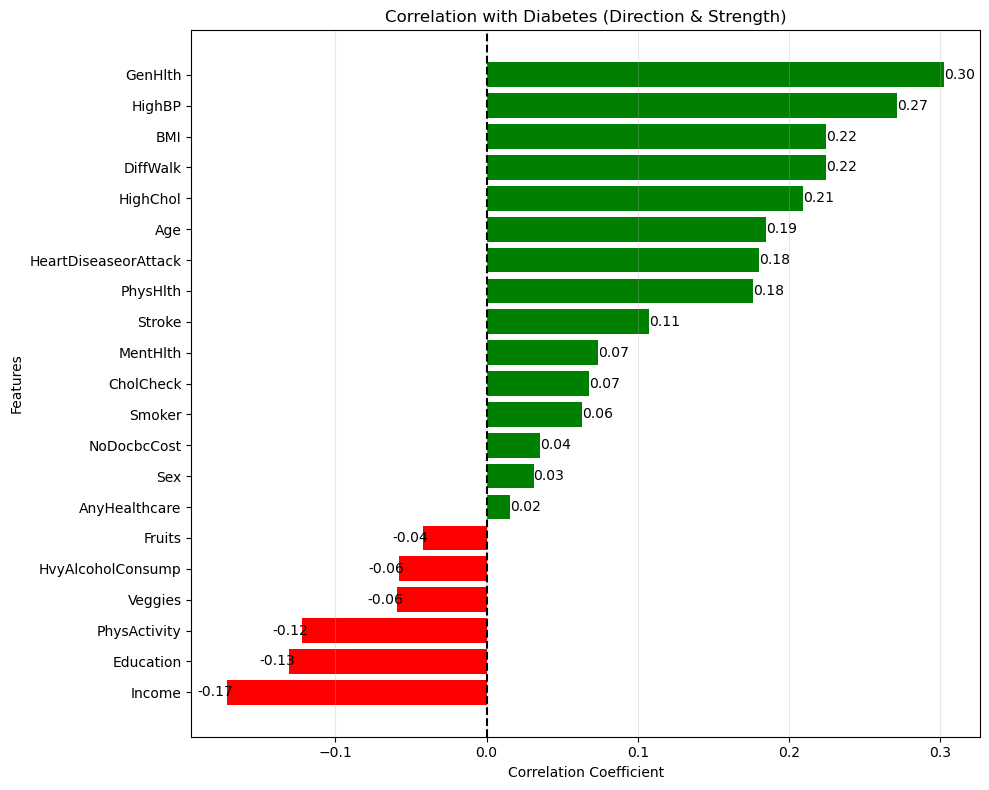

Correlation with Grades:
Income                 -0.171483
Education              -0.130517
PhysActivity           -0.121947
Veggies                -0.058972
HvyAlcoholConsump      -0.057882
Fruits                 -0.042192
AnyHealthcare           0.015410
Sex                     0.031040
NoDocbcCost             0.035436
Smoker                  0.062914
CholCheck               0.067546
MentHlth                0.073507
Stroke                  0.107179
PhysHlth                0.176287
HeartDiseaseorAttack    0.180272
Age                     0.185026
HighChol                0.209085
DiffWalk                0.224239
BMI                     0.224379
HighBP                  0.271596
GenHlth                 0.302587
Name: Diabetes_012, dtype: float64


In [64]:
grades_corr = correlation_matrix['Diabetes_012'].drop('Diabetes_012').sort_values()

# Create a bar plot showing correlation with grades
plt.figure(figsize=(10, 8))
bars = plt.barh(grades_corr.index, grades_corr.values, 
                color=np.where(grades_corr.values >= 0, 'green', 'red'))

# Add correlation values on bars
for bar in bars:
    width = bar.get_width()
    plt.text(width if width >=0 else width - 0.02,  # Position text
             bar.get_y() + bar.get_height()/2,
             f'{width:.2f}',
             va='center')

plt.axvline(0, color='black', linestyle='--')
plt.title("Correlation with Diabetes (Direction & Strength)")
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("Correlation with Grades:")
print(grades_corr)